# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import chart_studio.plotly as py
import cufflinks as cf

cf.go_offline()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sns

# Your Code Here

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [2]:
# your code here
fitbit = pd.read_csv('../data/Fitbit2.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

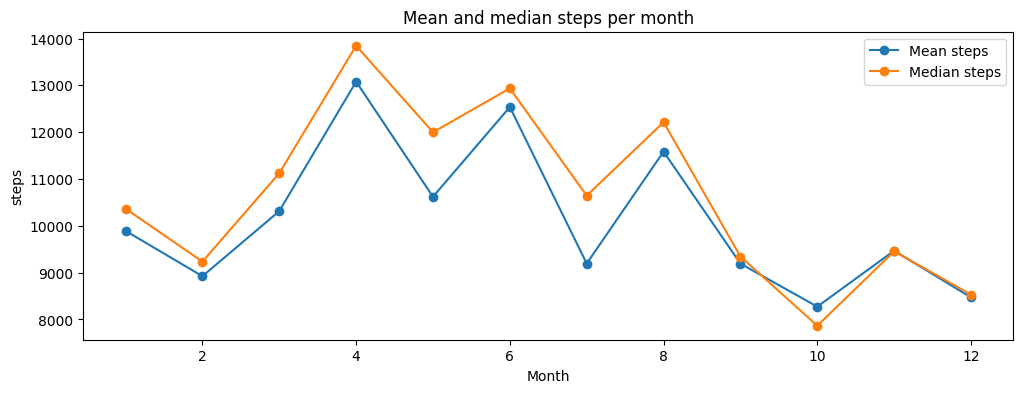

In [3]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here

plt.figure(figsize=(12, 4))

meansteps=fitbit.groupby('Months_encoded')['Steps'].mean().reset_index()
plt.plot(meansteps['Months_encoded'], meansteps['Steps'], marker= 'o', label = 'Mean steps')

mediansteps = fitbit.groupby('Months_encoded')['Steps'].median().reset_index()
plt.plot(mediansteps['Months_encoded'], mediansteps['Steps'], marker='o', label='Median steps')

plt.xlabel('Month')
plt.ylabel('steps')
plt.title('Mean and median steps per month')
plt.legend()

plt.savefig('figures/Mean_and_median_steps_per_month.png')


   Work_or_Weekend    Steps
0                0   9998.0
1                1  10445.5


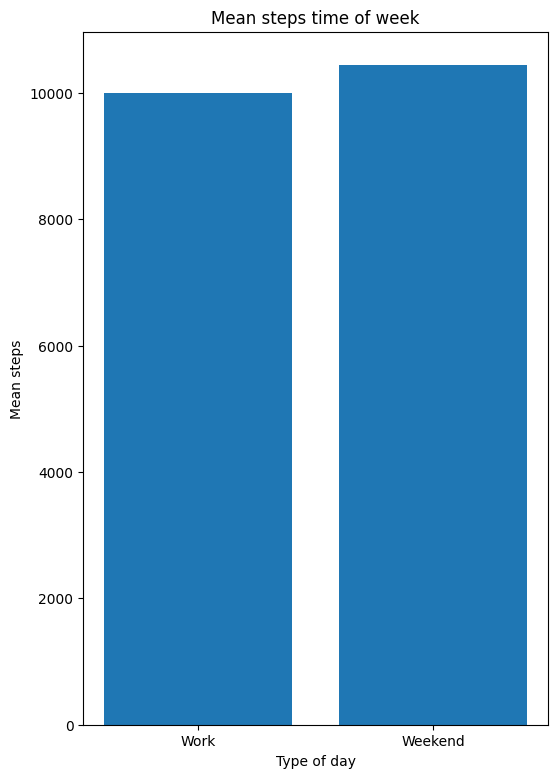

In [4]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here
plt.figure(figsize=(6, 9))

weeksteps= fitbit.groupby('Work_or_Weekend')['Steps'].median().reset_index()

print (weeksteps)

plt.bar(weeksteps['Work_or_Weekend'], weeksteps['Steps'])


plt.xlabel('Type of day')
plt.ylabel('Mean steps')
plt.title('Mean steps time of week')
plt.xticks([0, 1], ['Work', 'Weekend'])


plt.savefig('figures/Mean_steps_time_of_week.png')




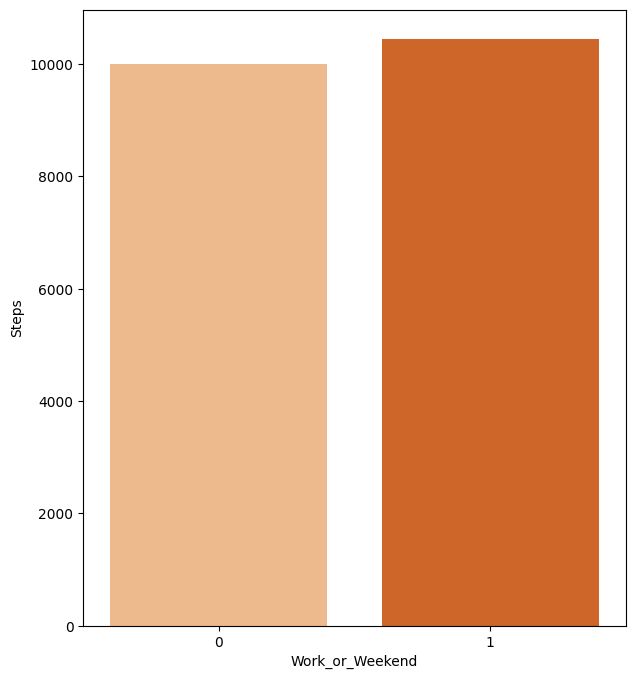

In [5]:
weeksteps = fitbit.groupby('Work_or_Weekend')['Steps'].median()

fig, ax = plt.subplots(figsize=(7, 8))


sns.barplot(x=weeksteps.index, y = weeksteps, palette= 'Oranges')

plt.savefig('figures/Mean_steps_time_of_week2.png')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

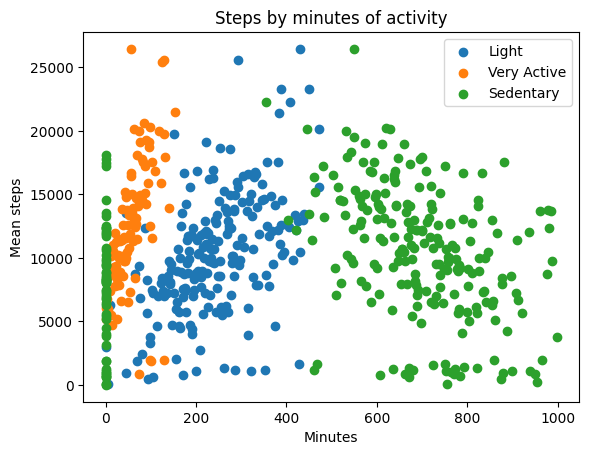

In [6]:
# your code here

Light = fitbit.groupby('Minutes Lightly Active')['Steps'].mean()
Very = fitbit.groupby('Minutes Very Active')['Steps'].mean()
Sedentary= fitbit.groupby('Minutes Sedentary')['Steps'].mean()

Loopgraphs = [Light, Very, Sedentary]

for set in Loopgraphs:
    plt.scatter(set.index, set.values)

plt.xlabel('Minutes')
plt.ylabel('Mean steps')
plt.title('Steps by minutes of activity')
plt.legend(['Light', 'Very Active', 'Sedentary'])
plt.savefig('figures/steps_by_activity.png')   

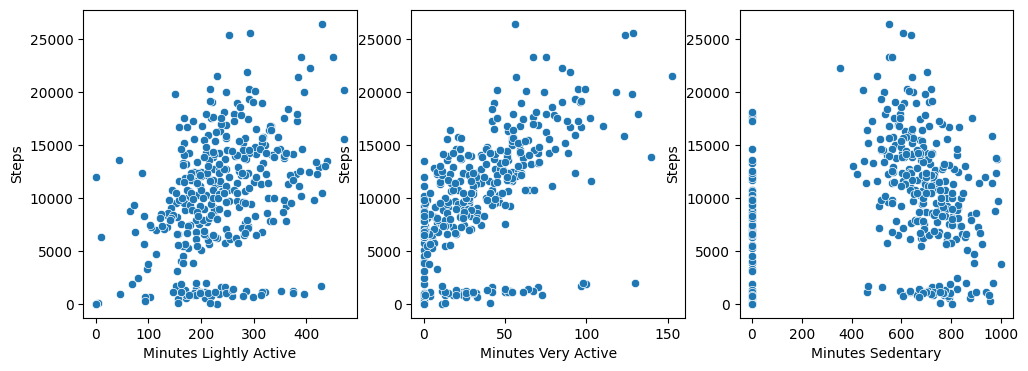

In [7]:
columnas = ['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']
fig, ax = plt.subplots(1, 3, figsize=(12, 4))


for set in range(3):
    sns.scatterplot(ax= ax[set] , 
                    data=fitbit,
                    x=columnas[set], 
                    y='Steps')

plt.savefig('figures/steps_by_activity2.png')   

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [4]:
# your code here
titanic = pd.read_csv('../data/titanic.csv')

titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [9]:
# your code here
titanic.dtypes



PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [10]:
# NUMERICAL VARIABLES
# your code here
Numerical= titanic.select_dtypes(include='number').columns.tolist()

Numerical

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [11]:
# CATEGORICAL VARIABLES
# your code here
Category = titanic.select_dtypes(include='object').columns.tolist()
Category

['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked']

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [12]:
# your code here
plt.figure(figsize=(12, 6))
plt.style.use('classic')



<Figure size 1200x600 with 0 Axes>

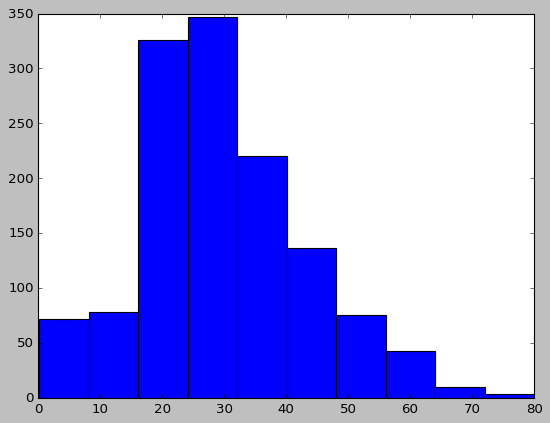

In [41]:
plt.hist(x=titanic.Age)

plt.savefig('figures/ClassicTitanic.png') 

#### Use the right visulalization to show the distribution of column `Age`.

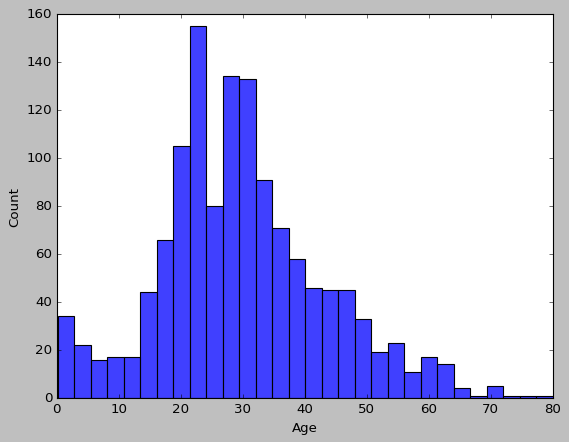

In [42]:
# your code here
sns.histplot(x=titanic.Age)
plt.savefig('figures/ClassicTitanicsns.png') 

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

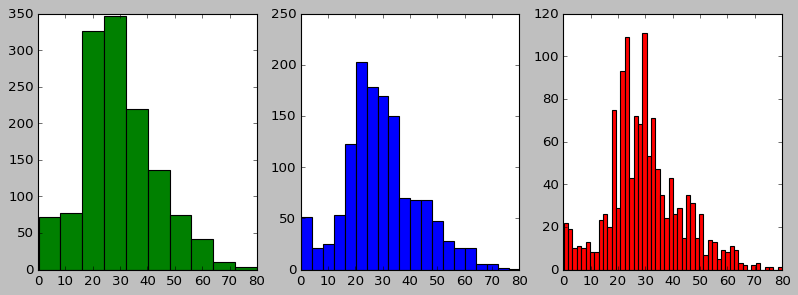

In [45]:
# your code here
figs, axs = plt.subplots(ncols=3, figsize=(12,4))
axs [0].hist(x=titanic.Age, bins=10, color = 'green')
axs [1].hist(x=titanic.Age, bins=20, color = 'blue')    #Poner axs [1] = plt.hist crea una estructura completamente diferente
axs [2].hist(x=titanic.Age, bins=50, color = "red")

plt.savefig('figures/AgeBins.png') 

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here


The bin size affects the level of detail in the graph. When we have a smaller number of bins, we can see an overall data trend, but smaller elements like outliers or variations may be 
difficult to determine or even overlooked. 
"""

#### Use seaborn to show the distribution of column `Age`.

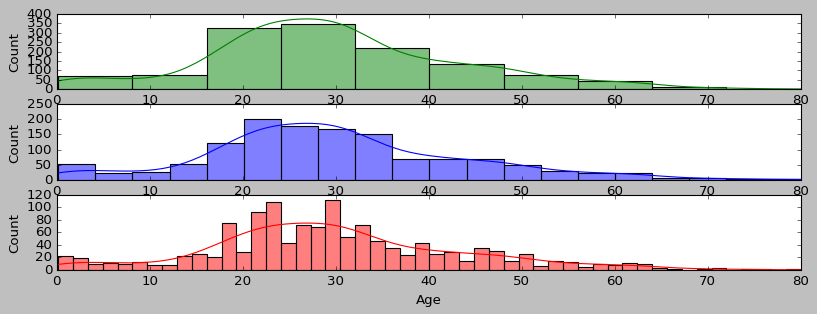

In [44]:
# your code here

fig, ax = plt.subplots(3, 1, figsize=(12,4)) 
bins=[10,20,50]
colours=['green', 'blue', 'red']
for i in range(3):
    sns.histplot(ax=ax[i], x=titanic.Age, kde=True, bins=bins[i], color=colours[i])

plt.savefig('figures/AgeBins2.png') 

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

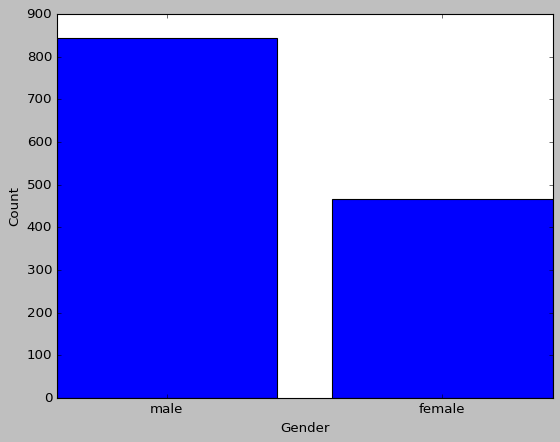

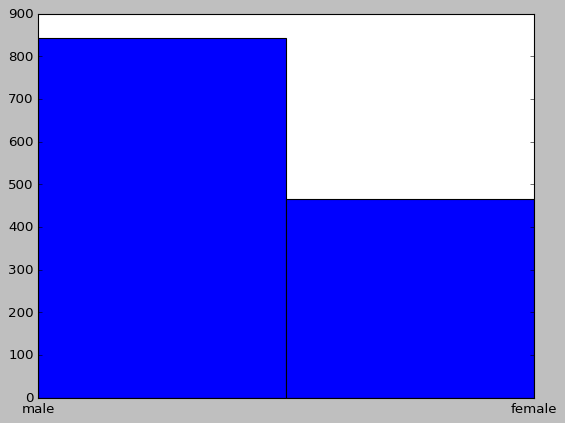

In [81]:
# Method 1 - matplotlib
# your code here
gender_counts = titanic['Gender'].value_counts()

# Create a bar chart of the gender variable
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig('figures/Gender.png')
plt.show()


plt.hist(x='Gender', bins=2, data=titanic)
plt.savefig('figures/Gender2.png')

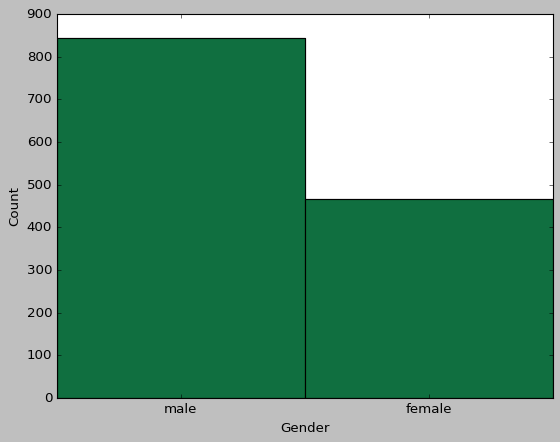

In [82]:
# Method 2 - seaborn
# your code here

sns.histplot(x='Gender', data=titanic)
sns.histplot(x=titanic.Gender)
plt.savefig('figures/Gender3.png')

#### Use the right plot to visualize the column `Pclass`.

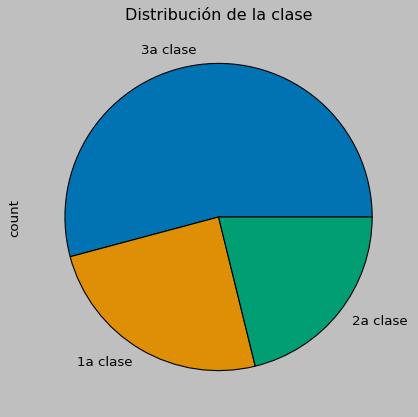

In [83]:
# your code here
colores = sns.color_palette('colorblind')

pclass_counts = titanic['Pclass'].value_counts()
labels = ['3a clase', '1a clase','2a clase']
pie_chart = pclass_counts.plot.pie(labels=labels, colors=colores)
pie_chart.set_title("Distribución de la clase")
plt.savefig('figures/ClassPie.png')
plt.show()



#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

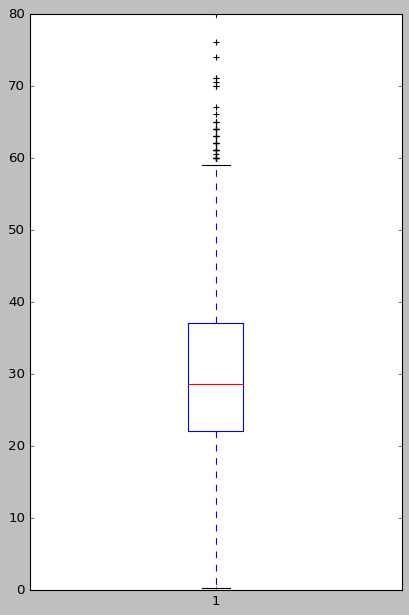

In [100]:
# your code here
plt.figure(figsize=(6, 9))
plt.boxplot(x="Age", data= titanic)
plt.xlabel= ('Passenger age')
plt.title = ('Age distribution of passengers')
plt.savefig('figures/AgeBox.png')

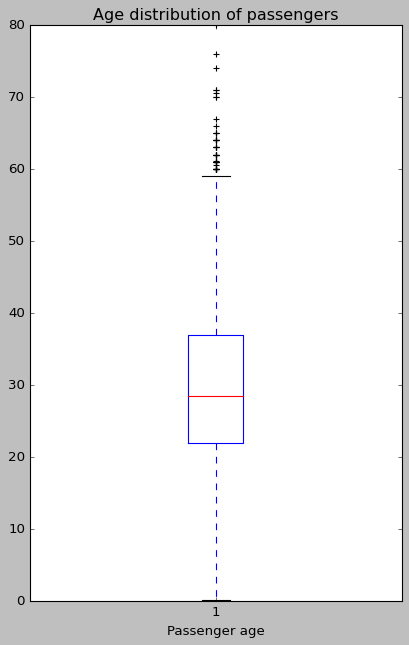

In [101]:
fig, ax = plt.subplots(figsize=(6, 9))
ax.boxplot(x=titanic.Age)
ax.set_xlabel('Passenger age')
ax.set_title('Age distribution of passengers')
plt.savefig('figures/AgeBox2.png')

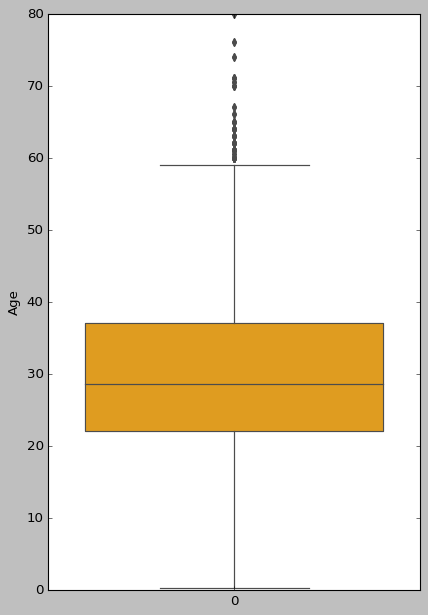

In [104]:
plt.figure(figsize=(6, 9))
sns.boxplot(y ='Age', data= titanic)
sns.boxplot(data=titanic.Age, color='orange')
plt.savefig('figures/AgeBox3.png');

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#La mayoría de pasajeros eran menores de 40 años, y habia un número muy reducido de gente mayor de 60 años.

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

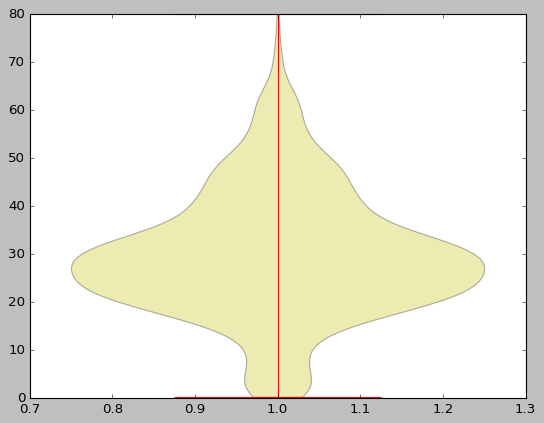

In [106]:
# your code here

plt.violinplot(titanic.Age)
plt.savefig('figures/Ageviolin.png');


#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
La mayoría de pasajeros se encontraban entre los 20 y los 30 años, y había más niños que ancianos a bordo.
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here



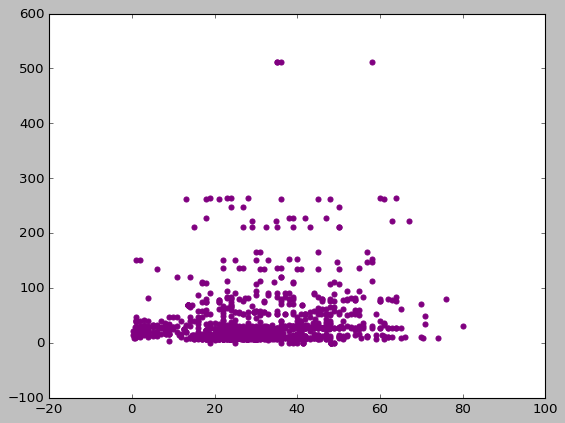

In [110]:
# Method 2 - seaborn
# your code here
plt.scatter(data=titanic, x='Age', y = 'Fare', color = 'purple')
plt.savefig('figures/AgeFare.png');

#### Plot the correlation matrix using seaborn.

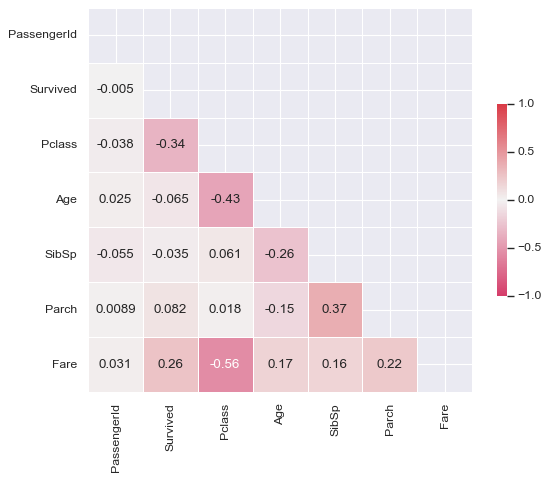

In [115]:
# your code here

numbercolumns = titanic.select_dtypes(include='number')
corr1 = numbercolumns.corr(method='pearson')
sns.set(style='darkgrid')
mascara=np.triu(np.ones_like(corr1, dtype=bool)) 
cmap=sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(corr1,             # datos
            mask=mascara,     # mascara
            cmap=cmap,        # color
            vmax=1,           # maximo vertical
            vmin=-1,          # minimo vertical
            center=0,         # centro
            square=True,      # cuadrado el dato pintado
            linewidth=0.5,    # ancho de la linea
            
            cbar_kws={'shrink': 0.5},  # barra de color
            annot=True)
plt.savefig('figures/AgeFareMatrix.png');

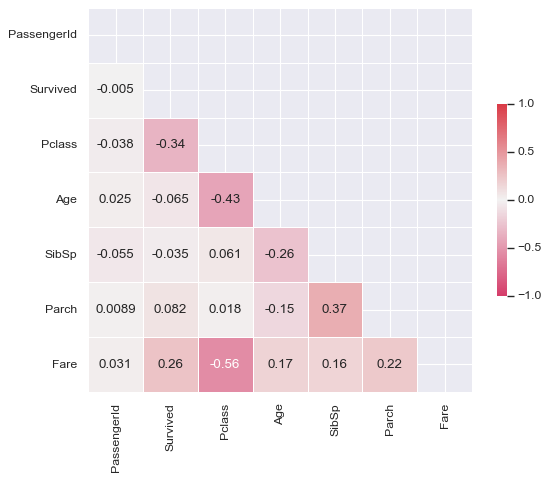

In [117]:
# your code here

numbercolumns = titanic.select_dtypes(include='number')
corr2 = numbercolumns.corr(method='spearman')
sns.set(style='darkgrid')
mascara=np.triu(np.ones_like(corr2, dtype=bool)) 
cmap=sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(corr1,             # datos
            mask=mascara,     # mascara
            cmap=cmap,        # color
            vmax=1,           # maximo vertical
            vmin=-1,          # minimo vertical
            center=0,         # centro
            square=True,      # cuadrado el dato pintado
            linewidth=0.5,    # ancho de la linea
            
            cbar_kws={'shrink': 0.5},  # barra de color
            annot=True)
plt.savefig('figures/AgeFareMatrix2.png');

#### What are the most correlated features?

In [ ]:
"""
your comments here

SibSp and Parch, with a correlation of 0.37. Fare and survival come second, 3rd, 4th, and 5th, whcih proves that survival was one of the most overall influential variables.
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

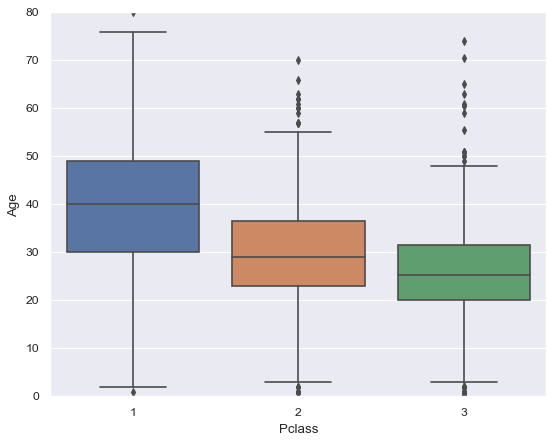

In [126]:
# your code here
sns.boxplot(x='Pclass', y='Age', data=titanic)
plt.savefig('figures/AgeClass.png');


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

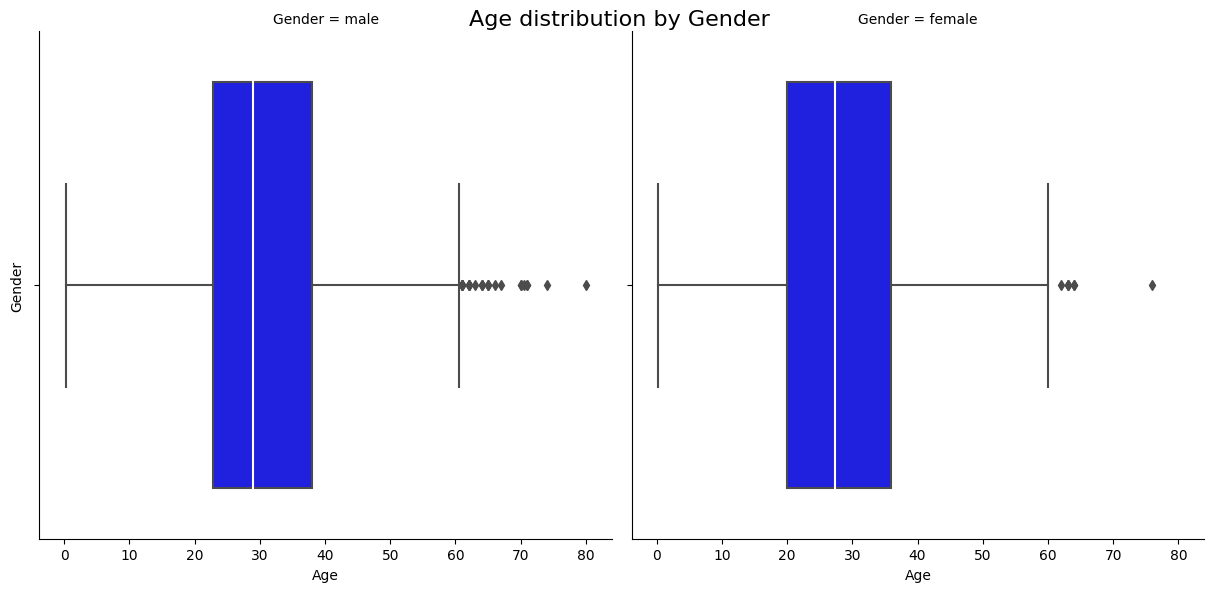

In [6]:
# create a FacetGrid object
g = sns.FacetGrid(titanic, col='Gender', height=6)

# specify the order of the categories on the x-axis
order = ['male', 'female']

# map a boxplot onto the FacetGrid, with custom colors and order of categories
g.map(sns.boxplot, 'Age', palette=['blue', 'green'], order=order, medianprops={'color':'white'}) #No consigo que tenga dos colores

# set axis labels
g.set_axis_labels('Age', 'Gender')
g.fig.suptitle('Age distribution by Gender', fontsize=16)



plt.savefig('figures/AgeGender.png')
